In [7]:
import numpy as np
from sklearn.datasets import load_iris
from keras.layers import Input, Dense
from keras.models import Model
import matplotlib.pyplot as plt

In [8]:
dataDir='D:/'
file_name=dataDir + 'data1.csv'

fRead= open(file_name, 'r')

data=[]
for line in fRead:
    arr=line.strip('\n').split(',')
    data.append(arr)
data=data[1:]

In [9]:
features = []
label = []
for i in range(len(data)):
    try:
        float(data[i][1])
        features.append(data[i][0:28])
        label.append(data[i][28])
    except ValueError:
        continue
        
features = np.asarray(features,dtype=float)
label = np.asarray(label,dtype=int)

In [27]:
# this is the size of our encoded representations
encoding_size = 2
encoding_dim = [64,32,16,encoding_size] 
input_size = 28
decoding_dim = [16,32,64,input_size]

# this is our input placeholder
input_data = Input(shape=(28,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim[0], activation='relu')(input_data)
encoded = Dense(encoding_dim[1], activation='relu')(encoded)
encoded = Dense(encoding_dim[2], activation='relu')(encoded)
encoded = Dense(encoding_dim[3], activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(decoding_dim[0], activation='relu')(encoded)
decoded = Dense(decoding_dim[1], activation='relu')(decoded)
decoded = Dense(decoding_dim[2], activation='sigmoid')(decoded)
decoded = Dense(decoding_dim[3], activation='tanh')(decoded)

In [28]:
autoencoder = Model(input_data, decoded)
encoder = Model(input_data, encoded)

In [29]:
encoded_input = Input(shape=(encoding_size,))
decoder_layer1 = autoencoder.layers[-4]
decoder_layer2 = autoencoder.layers[-3]
decoder_layer3 = autoencoder.layers[-2]
decoder_layer4 = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer4(decoder_layer3(decoder_layer2(decoder_layer1(encoded_input)))) )

In [30]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [31]:
autoencoder.fit(features,features,epochs=50,batch_size=256,shuffle=True,validation_split=0.2)

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 3s - loss: 0.9705 - val_loss: 0.8535
Epoch 2/50
227845/227845 [==============================] - 2s - loss: 0.8850 - val_loss: 0.8214
Epoch 3/50
227845/227845 [==============================] - 2s - loss: 0.8496 - val_loss: 0.8072
Epoch 4/50
227845/227845 [==============================] - 2s - loss: 0.8295 - val_loss: 0.7962
Epoch 5/50
227845/227845 [==============================] - 2s - loss: 0.8156 - val_loss: 0.7809
Epoch 6/50
227845/227845 [==============================] - 2s - loss: 0.8036 - val_loss: 0.7702
Epoch 7/50
227845/227845 [==============================] - 2s - loss: 0.7924 - val_loss: 0.7702
Epoch 8/50
227845/227845 [==============================] - 2s - loss: 0.7834 - val_loss: 0.7590
Epoch 9/50
227845/227845 [==============================] - 2s - loss: 0.7761 - val_loss: 0.7448
Epoch 10/50
227845/227845 [==============================] - 2s - loss: 0.77

In [32]:
reconstruction_error = np.array([])

encoded = encoder.predict(features)
decoded = np.asarray(decoder.predict(encoded))
error = features - decoded
for i in range(error.shape[0]):
    reconstruction_error = np.append(reconstruction_error, sum(error[i]))

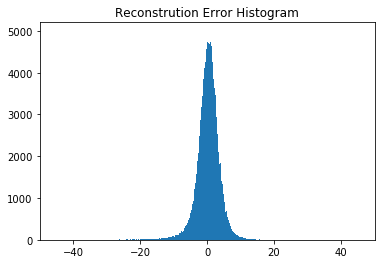

In [33]:
#Plotting Histogram
plt.hist(reconstruction_error,bins='auto')
plt.title('Reconstrution Error Histogram')
plt.xlim(-50,50)
plt.show()

In [50]:
#Loading Vanilla AE Reconstrution error
Re_error_part1 = np.load('D:/Re_error_vinilla.npy')

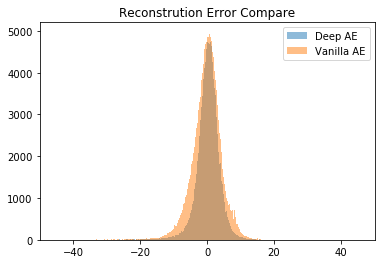

In [51]:
#Plotting Histogram and Compare between vanilla AE and Deep AE
plt.figure()
plt.hist(reconstruction_error,alpha=0.5,bins = 'auto',label='Deep AE')
plt.hist(Re_error_part1,bins = 'auto',alpha=0.5,label='Vanilla AE')
plt.legend(loc='upper right')

plt.title('Reconstrution Error Compare')
plt.xlim(-50,50)
plt.show()

In [34]:
#Index classifications
class1 = np.array([], dtype = int)
class2 = np.array([], dtype = int)
for i in range(label.shape[0]):
    if label[i]==0:
        class1 = np.append(class1, i)
    else:
        class2 = np.append(class2, i)

In [35]:
#Sample latent vectors
x = np.array([])
y = np.array([])
for i in range(encoded.shape[0]):
    x = np.append(x, encoded[i,0])
    y = np.append(y, encoded[i,1])

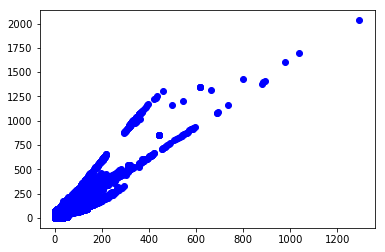

In [36]:
#Question 3
#Plotting latent vector
plt.figure()
plt.plot(x,y,'bo')
plt.show()

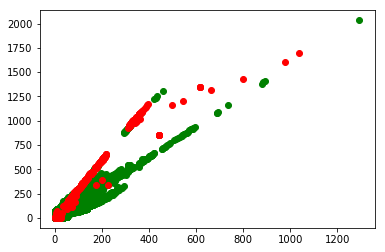

In [37]:
#Question 4
#Plotting scatter with label
plt.figure()
plt.plot(x[class1],y[class1],'go',x[class2],y[class2],'ro')
plt.show()